<a href="https://colab.research.google.com/github/rdbadrinathan19102004/urban_rural_classi-transfer_learning/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dansbecker/urban-and-rural-photos")

print("Path to dataset files:", path)

100%|██████████| 6.15M/6.15M [00:00<00:00, 27.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/urban-and-rural-photos/versions/2


In [2]:
!pwd

/content


In [3]:
!cp -r /root/.cache/kagglehub/datasets/dansbecker/urban-and-rural-photos/versions/2 /content

In [4]:
from keras.applications.resnet50 import ResNet50
from keras import Sequential
from keras.layers import Dense, Flatten

In [5]:
base_model= ResNet50(weights='imagenet', include_top=False)#1000 output that layer removed

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model= Sequential()

In [7]:
# model.add(base_model)
# model.add(Dense(2, activation='softmax'))

from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
# Define input shape explicitly
input_shape = (224, 224, 3)  # Standard input size for ResNet50

# Create the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Create the Sequential model with an Input layer
model = Sequential()
model.add(Input(shape=input_shape))  # Define the input layer
model.add(base_model)                # Add the pre-trained base model
model.add(Flatten())                 # Flatten the output
model.add(Dense(2, activation='softmax'))  # Final classification layer

# Optional: freeze base_model layers if you don't want them to be trainable
# for layer in base_model.layers:
#     layer.trainable = False

In [8]:
model.layers[0].trainable = False # so not update base model weights

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       200,706 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
#load our images use image data generator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
!pwd

/content


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/2/train'
val_data_dir = '/content/2/val'#validation data directory
image_size = (224, 224) # Adjust according to your needs
batch_size = 32 # Adjust according to your needs

train_datagen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  brightness_range=[0.8, 1.2], # Adjust brightness between 80% and 120%
  zoom_range=[0.8, 1.2], # Zoom in or out between 80% and 120%
  fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
  train_data_dir,
  target_size=image_size,
  batch_size=batch_size,
  class_mode='categorical'
)
# Create validation data generator
val_datagen = ImageDataGenerator() # Only rescale for validation

val_generator = val_datagen.flow_from_directory(
  val_data_dir,
  target_size=image_size,
  batch_size=batch_size,
  class_mode='categorical'
)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


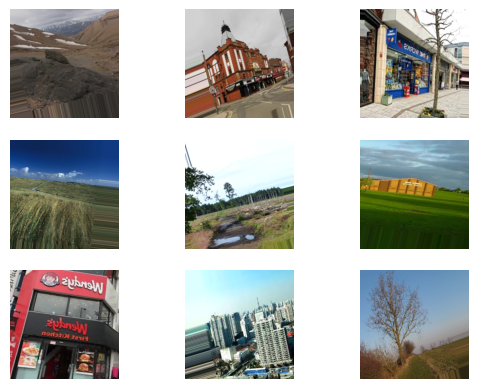

In [15]:
import matplotlib.pyplot as plt

# Assuming you have your train_datagen and train_generator setup

# Get a batch of augmented images
augmented_images, labels = next(train_generator)

# Normalize pixel values to 0-1
augmented_images = augmented_images / 255.0 # If your images are in the rang

# Display a few augmented images
for i in range(9): # Display 9 images
  plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[i])
  plt.axis('off')

plt.show()

In [16]:
augmented_images.shape

(32, 224, 224, 3)

In [26]:
model.fit(train_generator, validation_data=val_generator, steps_per_epoch=10, epochs=10)

Epoch 1/10
 3/10 ━━━━━━━━━━━━━━━━━━━━ 54s 8s/step - accuracy: 1.0000 - loss: 0.0000e+00  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0330
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9500 - val_loss: 0.1889
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9833 - loss: 0.1289 - val_accuracy: 0.9500 - val_loss: 0.1465
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.1162
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 2.8830e-04 - val_accuracy: 0.9500 - val_loss: 0.0928
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.0735
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9500 - val_loss: 0.0604
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.950

In [27]:
import numpy as np
np.argmax(model.predict(val_generator),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [28]:
val_generator.index_array

array([ 6, 10, 11,  8,  2, 16,  5, 19, 14, 13, 15, 12,  3, 17,  0,  1,  9,
       18,  7,  4])

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get true labels from the validation generator
y_true = val_generator.classes

# Predict labels for the validation data
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1) # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:",accuracy_score(y_true,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Confusion Matrix:
[[4 6]
 [7 3]]
Accuracy: 0.35


In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Get true labels from the validation generator
y_true = val_generator.classes

# Predict labels for the validation data
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1) # Convert predictions to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy:",accuracy_score(y_true,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Confusion Matrix:
[[4 6]
 [7 3]]
Accuracy: 0.35


In [22]:
#fundamental problem